 <!DOCTYPE html>
<html>
<head>
  <title>ESI CNN_Noise </title>
</head>
<body>

<h1>Retraining of the CNN on the noisy data</h1>
<p>Here we load already normalized data with corresponding labels. We load the pre-trained CNN model and retrain it with the noisy data. We retrain the CNN for 20 epochs with adam optimizer and 20 epochs with adagrad optimizer. </p>
<p>To make the notebook simple, we use only a small amount of data (50 R(q,t)) to train the CNN. We load data from a "Training data" folder.  </p>

</body>
</html> 

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
import keras
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)
%matplotlib inline

Retraining of the CNN with noisy data 

In [2]:
import matplotlib.pylab as plt
import numpy as np
import pickle

from matplotlib import image
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [3]:
T = np.load("training_data_Noise.npy", allow_pickle=True)
T_x = np.reshape(T, [50, 80, 109, 1])

Labels = np.load('training_Label_Noise.npy', allow_pickle=True)
Labels = tf.reshape(Labels, [50,10])


In [4]:
print(Labels[4,:])

tf.Tensor(
[0.85052572 0.32058857 0.74053516 0.90165227 0.69421226 0.46078153
 0.48397093 0.87050691 0.0686595  0.49003454], shape=(10,), dtype=float64)


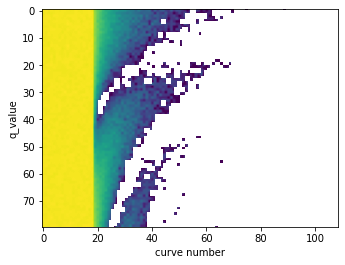

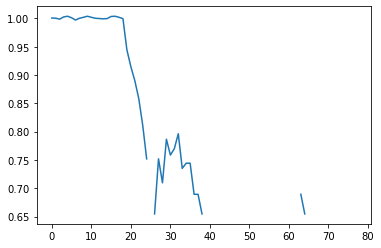

In [5]:
#plt.plot(q_values,T_x[::,90,150])
#plt.show()
plt.imshow(T_x[3,:,:,:])
plt.ylabel('q_value')
plt.xlabel('curve number')
plt.show()
plt.plot(T_x[3,79,:,:])
plt.show()


In [6]:
from tensorflow import keras

from tensorflow.keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Dropout, Flatten, BatchNormalization
from keras import metrics
from keras.callbacks import ModelCheckpoint, Callback, ReduceLROnPlateau, CSVLogger
from keras import optimizers
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D, Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import History

In [7]:
def y_absolute_error(ind):
    def abs_err(y_true, y_pred):
        absolute_error = keras.backend.mean(abs(y_true[ind] - y_pred[ind]), axis=0)
        return absolute_error

    return abs_err

In [8]:
model=load_model('conv_models/20211021_exp_adagrad')

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 79, 108, 32)       160       
_________________________________________________________________
batch_normalization_12 (Batc (None, 79, 108, 32)       128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 78, 107, 32)       4128      
_________________________________________________________________
batch_normalization_13 (Batc (None, 78, 107, 32)       128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 77, 106, 32)       4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 53, 32)        0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 38, 53, 32)       

In [9]:
model.compile(optimizer= 'adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.fit(T_x, #X_training,
                    Labels, #thickness_training,
                    epochs=20,
                    batch_size=512,
                    verbose=1,
                    validation_split=0.2
                   )

score, acc = model.evaluate(T_x, Labels)

print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/20


2022-05-26 12:14:48.320058: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 373.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-26 12:14:48.329993: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 373.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-26 12:14:48.350446: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 373.02MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-26 12:14:48.370932: W tensorflow/core/common_runtime/bfc_allocator.cc:248]

1/1 [==============================] - ETA: 0s - loss: 0.0690 - mean_absolute_error: 0.2180

2022-05-26 12:14:48.602154: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 380.85MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-05-26 12:14:48.644478: W tensorflow/core/common_runtime/bfc_allocator.cc:248] Allocator (GPU_0_bfc) ran out of memory trying to allocate 381.75MiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


1/1 [==============================] - 4s 4s/step - loss: 0.0690 - mean_absolute_error: 0.2180 - val_loss: 0.0718 - val_mean_absolute_error: 0.2111
Epoch 2/20
1/1 [==============================] - 0s 107ms/step - loss: 0.0633 - mean_absolute_error: 0.2087 - val_loss: 0.0684 - val_mean_absolute_error: 0.2060
Epoch 3/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0602 - mean_absolute_error: 0.2002 - val_loss: 0.0637 - val_mean_absolute_error: 0.1989
Epoch 4/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0584 - mean_absolute_error: 0.1957 - val_loss: 0.0596 - val_mean_absolute_error: 0.1943
Epoch 5/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0571 - mean_absolute_error: 0.1928 - val_loss: 0.0576 - val_mean_absolute_error: 0.1926
Epoch 6/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0553 - mean_absolute_error: 0.1905 - val_loss: 0.0634 - val_mean_absolute_error: 0.2026
Epoch 7/20
1/1 [==========================

2022-05-26 12:14:52.084944: W tensorflow/core/common_runtime/bfc_allocator.cc:314] Garbage collection: deallocate free memory regions (i.e., allocations) so that we can re-allocate a larger region to avoid OOM due to memory fragmentation. If you see this message frequently, you are running near the threshold of the available device memory and re-allocation may incur great performance overhead. You may try smaller batch sizes to observe the performance impact. Set TF_ENABLE_GPU_GARBAGE_COLLECTION=false if you'd like to disable this feature.


2/2 [==============================] - 1s 198ms/step - loss: 0.0736 - mean_absolute_error: 0.2162
Test score: 0.07363776117563248
Test accuracy: 0.21619747579097748


In [10]:
model.compile(optimizer= 'adagrad',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

model.fit(T_x, #X_training,
        Labels, #thickness_training,
        epochs=20,
        batch_size=512,
        verbose=1,
        validation_split=0.2
        #validation_data=(X_val, thickness_val),
        )

score, acc = model.evaluate(T_x, Labels)

print('Test score:', score)
print('Test accuracy:', acc)

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0369 - mean_absolute_error: 0.1596 - val_loss: 0.0791 - val_mean_absolute_error: 0.2223
Epoch 2/20
1/1 [==============================] - 0s 106ms/step - loss: 0.0369 - mean_absolute_error: 0.1595 - val_loss: 0.0806 - val_mean_absolute_error: 0.2234
Epoch 3/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0369 - mean_absolute_error: 0.1595 - val_loss: 0.0800 - val_mean_absolute_error: 0.2234
Epoch 4/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0368 - mean_absolute_error: 0.1594 - val_loss: 0.0795 - val_mean_absolute_error: 0.2231
Epoch 5/20
1/1 [==============================] - 0s 106ms/step - loss: 0.0368 - mean_absolute_error: 0.1593 - val_loss: 0.0788 - val_mean_absolute_error: 0.2229
Epoch 6/20
1/1 [==============================] - 0s 105ms/step - loss: 0.0368 - mean_absolute_error: 0.1593 - val_loss: 0.0776 - val_mean_absolute_error: 0.2219
Epoch 7/20
1/1 [===============

In [11]:
#model.save('convolutionalmodels/Noise_adagrad')

#### 